<font color ='Navy'><center> __BruFace__ </center></font>
<br> MA1 Mechanical Engineering <br>  __Mechanical vibrations__ <br>
***
***
<font color='Navy'><h1><center>Session 5 : Continuous systems</center></h1></font> 
***
<div class="alert alert-block alert-info">  
<center><b>Welcome to the fifth session. The primary focus of today's session is to delve into and explore the realm of continuous systems.</b></center>  
</div>  

# <u>Table of contents</u> 
1. [System parameters](#system)
    1. [Natural pulsation](#wn)
    2. [Mode shape](#phi)
    3. [Modal mass](#analytical)
    4. [Modal stiffness](#analytical2)
2. [Modal space](#modal)
    1. [Modal Force](#modal_force)
    2. [Modal Response](#modal_response)
3. [Physical space](#phyiscal)
    1. [Total response](#utot)
    2. [Truncation](#truncation)
4. [Dynamic Loading](#Dynamic)

Before we start, let us import some relevant libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# For local use : %matplotlib notebook; for use on jupyterLab: %matplotlib widget
%matplotlib widget

# Exercise 1: Continuous simply supported beam <a class="anchor" id="system"></a>

## Link with the previous session 
For continuous systems like beams, the vibration can be represented using an infinite number of degrees of freedom (infinite DOFs). However, for practical computational purposes, we need to discretize the system into finite elements or use modal truncation. 

**Modal Projection**: After finding the mode shapes and frequencies, we can project the equations of motion of the continuous system onto these mode shapes. This gives us a set of uncoupled single degree of freedom equations, each corresponding to a mode.

### Considered structure: simply supported beam

Consider a simply supported beam constructed from aluminum with the following properties:
- Length: $L = 1 m$
- Cross-section : Rectangular
    - Width: $b = 10 mm$
    - Height: $h = 1 mm$
    - Equation for area moment of inertia: $I(x) = \frac{bh^3}{12}$
    - Cross-section area: $A$    
- Material Propreties :
    - Young's Modulus: $E = 70 GPa$
    - Density: $\rho = 2700 kg/m^3$

As drawn below:

<img src="Images/ss_beam.png" alt="alt text" style="max-width: 50%;">

### Natural pulsation <a class="anchor" id="wn"></a>

In this segment of the exercise, we shall derive the analytical formulation for the eigenfrequencies and the corresponding mode shapes of the beam. We will visualize the initial three mode shapes and provide the values of their corresponding eigenfrequencies, expressed in Hertz (Hz).

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 1.1:** Complete the function `natural_pulsation` below which has as input arguments the material and geometrical properties of the beam as well as the indices of the natural frequencies to compute, and as an output an array with the natural pulsations ranked in increasing order. Use the correct equation for a simply supported beam as found in the course notes.
</div>

In [2]:
def natural_pulsation(E,rho,L,I,A,n):
    
    """ 
    Compute natural pulsations for a simply supported beam.
     
    Arguments:
    E (float)  -- Young's modulus [Pa]
    rho (float) -- Density [kg/m^3]
    L (float)  -- Length of the beam [m]
    I (float)  -- Bending inertia of the section [m^4]
    A (float)  -- Area of the section [m^2]
    n (array | int )  -- Indices of natural frequencies to compute (could be a list or int)

    Returns:
    w (array)  -- Array of natural pulsations [rad/s]
    """
    
    w = (((n*np.pi)/L)**2)*np.sqrt((E*I)/(rho*A))
    
    return w

Let us test your implementation, by checking some standard checks

In [3]:

assert np.isclose(natural_pulsation(E=1,rho=1,L=1,I=1,A=np.pi**4,n=1), 1),"This is not right" 
assert not np.iscomplex(natural_pulsation(E=1,rho=1,L=1,I=1,A=np.pi**4,n=1)), "The value should be real"
assert natural_pulsation(E=1,rho=1,L=1,I=1,A=np.pi**4,n=1) > 0, "The value should be positive " 
assert natural_pulsation(E=1,rho=1,L=1,I=1,A=np.pi**4,n=2) > natural_pulsation(E=1,rho=1,L=1,I=1,A=np.pi**4,n=1), "The second order value should exceed the first order result" 



<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;"> <a class="wn" id="time"></a>

**Assignment 1.2:** Use the function `natural_pulsation` to compute the first 10 natural frequencies of the beam.
Notice that the input `n` can be a single integer or a list of integers. If it is a single integer, the function should return a single value.
If it is a list of integers, the function should return a list of values.
</div>
Please use following names and units for your variables:

```python
E in Pa
rho in kg/m^3
L in m
b in m
h in m
I in m^4
A in m^2
Result should be saved in an array called `omega_n`
```


In [4]:
E, rho, L, b, h = None, None, None, None, None
I, A = None, None
omega_n = None

E, rho, L, b, h = 70e9, 2700, 1, 10e-3, 1e-3
I, A = (b*h**3)/12, b*h
omega_n = natural_pulsation(E,rho,L,I,A,n=np.arange(1,11))

And let us verify your results:

In [5]:
assert np.isclose(omega_n[0], 14.506,atol=1e-1), f'Your first result is wrong: {omega_n[0]} vs. 14.506'
assert np.isclose(np.sqrt(omega_n[2]/omega_n[1]), 1.5)

assert len(omega_n) == 10, f'You only stored {len(omega_n)} pulsations in omega_n, the assignment asks for 10.'


### Mode shapes <a class="anchor" id="phi"></a>

Having established a method to compute the natural pulsations, our subsequent progression involves determining the associated mode shapes. In our study of Multi-Degree-of-Freedom (MDOF) systems and the modal space, we decomposed the system into individual modes, each represented by a mode shape. Similarly, for our beam, a continuous system, the mode shapes represent the spatial patterns of vibration of indiviual modes at the different resonance frequencies. 


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 1.3:** Complete the function `modal_shape` which has as input arguments an array of values for $x$ (representing different positions along the length of the beam), the length of the beam $L$ and the order of the mode shape $n$ and as an output the $n^{th}$ modeshape expressed at all the values of position in the array $x$.

In [6]:
def modal_shape(L,x,n):
    """ 
    Compute the mode shape for a simply supported beam.
    The function calculates the mode shape using the analytical solution that can be found in the course notes.
    
    Arguments:
    - L (float)    : Total length of the beam [m]
    - x (array-like): Positions along the length of the beam [m]
    - n (int)      : Mode number (i.e., order of the mode shape)

    Returns:
    - y (array-like): Mode shape values at the positions defined by x
    """
    if hasattr(x, '__iter__') and len(x)>1000:
            raise ValueError(f'To save memory, have at max 1000 points in x, you have {len(x)}')
    if np.max(x) > L:
        raise ValueError(f'x contains a value {max(x)} that exceeds L: {L}')
    
    y = np.sin((n*np.pi*x)/L)
    
    return y

And let us check your results:

In [7]:
# cell metadata=autograder-tests
assert modal_shape(1,0.5,1) == 1
assert modal_shape(1,0.25,2) == 1


###  Mode shapes visualization <a class="anchor" id='modeshapes'></a>

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">
    
**Assignment 1.4:** Complete the cell below to visualize the first **6 mode shapes** of the beam. Also calculate the resonance frequencies (_Hz_) of the mode, store these in `fn`. Store the mode shapes in a list `mode_shapes`
</div>

In [8]:
n = 6  # The number of modes we want to plot

x = None # Make this into a vector of coordinates
mode_shapes = []
fn = []

x = np.linspace(0,L,1000)
mode_shapes = []
fn = []

for i in range(1,n+1):
    omega_i = natural_pulsation(E,rho,L,I,A,i)
    fn.append(omega_i/(2*np.pi))
    shape = modal_shape(L,x,i)
    mode_shapes.append(shape)

Some quick checks, and then we plot your results.

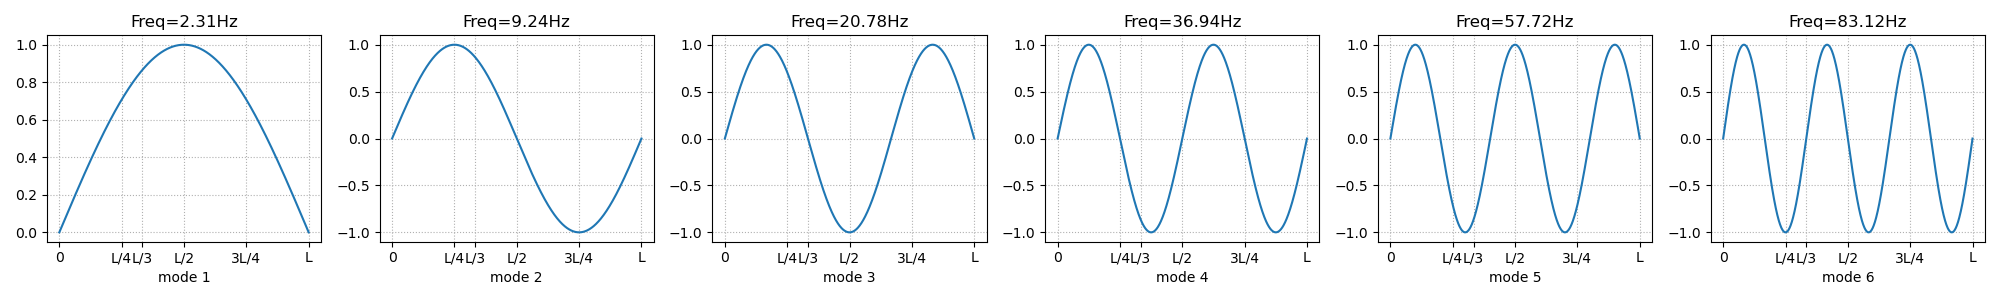

In [9]:
assert len(fn) == n, f"Have you stored the {n} resonance frequencies in fn?"
assert len(mode_shapes) == n, f"Have you stored the {n} mode_shapes in a list named mode_shapes?"
assert len(mode_shapes[0]) == len(x), f"The dimensions of x {len(x)} and your modeshapes {len(mode_shapes[0])} do not match"


# The plotting starts here


fig, ax = plt.subplots(nrows=1, ncols=n, figsize=(20,3))
for i, ax in enumerate(ax):
    ax.plot(x,mode_shapes[i])
    ax.set_ylabel('')
    ax.set_xlabel('mode '+str(i+1))
    ax.set_title('Freq='+str(np.round(fn[i],2))+'Hz')
    ax.grid(which='both', linestyle=':')
    ax.set_xticks([0,  L/4, L/3, L/2, 3*L/4, L])
    ax.set_xticklabels(['0', 'L/4', 'L/3', 'L/2', '3L/4', 'L']) 
plt.tight_layout()

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">
    
**Assignment 1.5:** Looking at the 6 mode shapes of the beam in **Assignment 1.4**, how many zero-crossing points are visable in each mode? Fill in your answer in `zero_crossing_points` = `[n1,n2,n3,n4,n5,n6]` where n1, n2 are integers for the number of zero-crossing points for modes 1 to 6. 

**Note**: Another way to call a zero-crossing point is a ***nodal* *point*** where the mode's response is zero.
</div>

In [10]:
zero_crossing_points = []

zero_crossing_points = [0, 1, 2, 3, 4, 5]

Lets test your implemntation

In [11]:
assert len(zero_crossing_points) == 6, f"zero_crossing_points should have 6 elements, not {len(zero_crossing_points)}"
for i in zero_crossing_points:
    assert isinstance(i, int), f"The number of zero crossings should be an integer, not {i}"
    assert i>=0, "The number of zero crossings should be non-negative"
    

### Modal mass <a class="anchor" id="analytical"></a>

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 1.6**: You are tasked to complete the `compute_modal_mass` function, which accepts the beam's material and geometric properties as input arguments and returns an array containing the modal masses.
</div>

It's essential to recall the formula for modal mass $\mu_n$ of the n-th mode of a continuous system:
$$\mu_n = \int_0^L \rho A \psi_n^2(x) dx$$
Given that our beam is simply supported and possesses a sinusoidal mode shape described by $\psi_n (x)=\sin(\frac{n\pi x}{L})$, the integral can be analytically evaluated to find an expression for $\mu_n$.  It is worth the try for yourself!



<details>
    <summary><b> Click to get the expression for $\mu_n$</b></summary>
    Working out the integral $$\mu_n = \int_0^L \rho A \sin^2(\frac{n\pi x}{L}) dx$$ is relatively straightforward if you use the identity:
    $$sin^2(x)=\frac{1-cos(2x)}{2}$$
    and doing a substitution 
    $$u=\frac{2n\pi{}x}{L}$$
    ultimately this will result in $$\mu_n = \frac{\rho A L}{2}$$
</details>  
    
    
**Note** that for this structure the modal mass is independent of the mode's index `n`, however, this is an exception and we still give it as an input  to the function.



In [12]:
def compute_modal_mass(rho, A, L, n):
    """
    Arguments:
    rho -- the density of the material (in kg/m^3)
    A -- the cross-sectional area of the beam (in m^2)
    L -- the length of the beam (in m)
    n -- the mode number not used in the function, but needed for consistency with the other functions    

    Returns:
    mu_n -- the modal mass (in kg)
    """
    
    mu_n = (rho*A*L)/2
    
    return mu_n

Let us check your results:

In [13]:
assert np.isclose(compute_modal_mass(1,1,1,1),0.5)
assert np.isclose(compute_modal_mass(1,2,1,1),1)
w_array= np.linspace(0,80*2*np.pi,1024);


### Modal stiffness <a class="anchor" id="analytical2"></a>

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 1.7:** The logical step now is to compute the modal stiffness. Work out the math and try to find an analytical expression for the modal stiffness. Complete the function `compute_modal_stiffness` below which has as input arguments the material and geometrical properties of the beam and as an output an array with the modal stiffnesses. 

**TIP**: There are 2 ways to compute the modal stiffness.

In [14]:
def compute_modal_stiffness(E, I, L, n):
    """
    Arguments:
    E -- the Young's modulus of the material (in Pa)
    I -- the moment of inertia of the beam's cross-section (in m^4)
    n -- the mode number
    L -- the length of the beam (in m)
    
    Returns:
    k_n -- the modal stiffness (in N.m^2)
    """

    k_n = (E*I*(np.pi**4)*(n**4))/(2*L**3)

    return k_n

And let us check your work:

In [15]:
E = 70e9
L = 1
I = b*h**3/12
A = b*h
assert np.round(compute_modal_stiffness(E=E, I=I, L=L,n=10), 3) == 28410.985

## Modal Space <a class="anchor" id="modal"></a>

In this section, we aim to understand how a load applied to a beam can be projected onto its mode shapes. This is a fundamental step in modal analysis, allowing us to determine how much each vibration mode is excited by a given load.

1. **Define the Beam**
    - Set the beam length (e.g., $L = 1$.)

2. **Apply a Loading Profile**
    - Specify a loading function $p(x)$ that describes how the force is distributed along the beam's $x$ coordinate.

3. **Project the Load with Mode Shapes**
    - For each mode $n$, compute the mode shape $\psi_n(x)$.
    - Calculate the product $p(x) \cdot \psi_n(x)$ at each position $x$.
    - Integrate this product over the length of the beam to obtain the modal force:
      $$ F_n = \int_0^L p(x) \cdot \psi_n(x) \, dx $$

The following function `modal_excitation` is defined to compute the modal force $F_n$.

***Note***:  Since we have discrete values for $p(x)$ and $\psi_n(x)$, we use numerical integration. `np.trapz` is used to approximate this integral using the trapezoidal rule.

###  Modal Force <a class="anchor" id="modal_force"></a>

In [16]:
def modal_excitation(p_x, psi_n, x):
    """
    Compute the modal excitation for a given mode shape psi_n(x) and load distribution p(x).

    Arguments:
    p_x (array-like) -- Load distribution along the beam (N/m)
    psi_n (array-like) -- Mode shape values at positions defined by x
    x (array-like) -- Positions along the length of the beam (m)

    """
    assert len(p_x) == len(psi_n) == len(x), "Input arrays must have the same length"
    integrand = p_x * psi_n
    dx = x[1] - x[0]
    F_n = np.trapezoid(integrand, dx=dx)
    return F_n

The `point_load` function below creates an approximation of a unit point load applied to a beam at a specified location $x_{in}$. Since a true mathematical point load cannot be represented directly in a numerical array, the function simulates it by applying a value of 1 over a very small interval (of width `L/1000`) starting at position `a` and ending at `b = x_in + L/1000`.

In [17]:
def point_load(L, x, x_in):
    """
    Arguments:
    L (float)  -- length of the beam [m]
    x (array)  -- positions along the length of the beam [m]
    x_in (float) -- position of the point load [m]
    
    Returns:
    """ 
    a=x_in
    b=x_in+L/1000
    pload = np.where((x >= a) & (x <= b), 1, 0) # This creates a point load of 1 N/m over a small segment of the beam
    return pload

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 2.1:** Use the function `point_load` to compute a unit point load applied to an input location $x_{in}$ = $L/3$ of the beam. Plot the computed point load on the beam. 

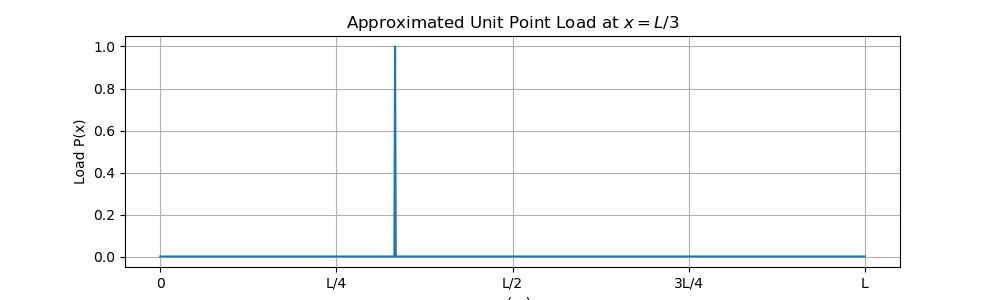

In [18]:
L= None # length of the beam
x= None # positions along the beam
x_in = None # position of the point load
p = None # define a simple point load using the function point_load

fig, ax = plt.subplots(figsize=(10, 3))

L = 1
x = np.linspace(0,L,1000)
x_in = L/3
p = point_load(L,x,x_in)

ax.plot(x,p)

ax.set_title('Approximated Unit Point Load at $x = L/3$')
ax.set_xlabel('x (m)')
ax.set_ylabel('Load P(x)')
ax.set_xticks([0, L/4, L/2, 3*L/4, L])
ax.set_xticklabels(['0', 'L/4', 'L/2', '3L/4', 'L'])
ax.grid(True)

Let us check your results

In [19]:
assert np.allclose(point_load(L, x, x_in), point_load(L, x, x_in + L/1000), atol=1), "Something is wrong of your calculation of the point load"
assert np.max(point_load(L, x, x_in)) == 1, "The point load should be 1 at the position of the load"
assert np.min(point_load(L, x, x_in)) == 0, "The point load should be 0 outside the position of the load"

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 2.2:** Use the function `modal_excitation` to compute the modal force $F_n$ for a point load $P(x)$ applied at input lovation $x_{in}$ = $L/3$. Use only the first 6 modes as pre-defined in `n_list`. 

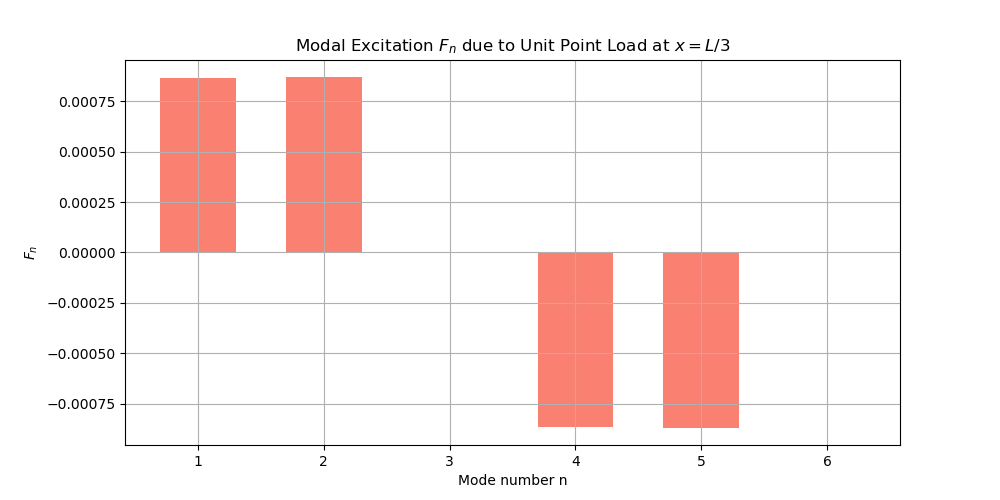

In [20]:
n_list = np.arange(1, 7)  # first 6 modes
x = np.linspace(0, L, 1000)  # positions along the beam
p = None  # define your point load
psi_list = None  # list of mode shapes
F_n_list = None # list of modal forces

p = point_load(L,x,L/3)
psi_list = []
for i in n_list:
    psi_list.append(modal_shape(L,x,i))
F_n_list = []
for psi in psi_list:
    F_n_list.append(modal_excitation(p,psi,x))

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(n_list, F_n_list, color='salmon', width=0.6) 
ax.set_xticks(n_list)
ax.set_xlabel('Mode number n')
ax.set_ylabel('$F_n$')
ax.set_title('Modal Excitation $F_n$ due to Unit Point Load at $x = L/3$')
ax.grid(True)

**Check your plot**

What do you observe in your plot? Why there are modal forces with zero value? Link your observations with the mode shapes plot in `Assignment 1.4`.

Lets check your results

In [21]:
assert np.allclose(modal_excitation(p, psi_list[0], x), 0.00086689, atol=1e-8), "Modal excitation for mode 1 is incorrect"
assert np.allclose(modal_excitation(p, psi_list[2], x), 0.0, atol=1e-8), "Modal excitation for mode 3 should be zero"


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 2.3** For yourself, why do some modes have a zero modal force? 
</div>
<details>
    <summary><b> Click to get the answer </b></summary>
    Applying a force at $L/3$ means the force is applied on the nodal point of modes 3 and 6 (Have a look back at Assignment 1.4), in other words a force applied only at $L/3$  is not able to excite those particular modes. This reflects in a modal forces equal to zero.
</details>  



### Modal Response <a class="anchor" id="modal_response"></a>

Now that we have computed the modal forces $F_n$ for each mode, we can proceed to calculate the modal responses $z_n(\omega)$. Each modal response describes how much the $n$-th mode is excited at a given frequency $\omega$ due to the applied force.

The equation for the modal response in the frequency domain is:

$$
z_n(\omega) = \frac{F_n}{\mu_n \left( \omega_n^2 - \omega^2 + 2j \xi_n \omega_n \omega \right)}
$$

where:
- $F_n$ is the modal force for mode $n$,
- $\mu_n$ is the modal mass,
- $\omega_n$ is the natural frequency of mode $n$,
- $\xi_n$ is the damping ratio for mode $n$,
- $\omega$ is the excitation frequency.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 2.4:** Complete the function below `modal_response` to calculate the $z_n(\omega)$ in the frequncy domain.

In [22]:
def modal_response(F_n, mu_n, omega_n, xi_n, omega):
    """
    Compute the modal response z_n(omega) for a given mode.

    Parameters:
    - F_n (float): Modal force for mode n
    - mu_n (float): Modal mass
    - omega_n (float): Natural frequency for mode n [rad/s]
    - xi_n (float): Damping ratio for mode n
    - omega (array): Excitation frequencies [rad/s]

    Returns:
    - z_n (array): Frequency-dependent modal response (complex values)

    """
    z_n = []

    z_n = F_n/(mu_n*(omega_n**2-omega**2+2j*xi_n*omega_n*omega))

    return z_n


Let us check that you implmented `modal_response` correctly.

In [23]:
Fn = modal_excitation(p, psi_list[0], x)  # Modal force for mode 1

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 2.5:** Use the function `modal_response` to calculate the modal responses $z_n(\omega)$ of the first 6 modes of the beam. Create an array of `omega` between 0 and 100 Hz.

**Note**: Assume zero modal damping for now.

In [24]:
Fn = None  # modal force for mode n
mu_n = None  # modal mass for mode n
omega_n = None  # natural frequency for mode n
xi_n = None  # damping ratio for mode n
omega = None  # excitation frequencies

z_n = []  # Initialize modal response list

omega = np.linspace(0, 100*2*np.pi, 1000)
omega_n = natural_pulsation(E, rho, L, I, A, np.arange(1, 7))
xi_n = 0

for n in range(1, 7):
    Fn = F_n_list[n-1]
    mu_n = compute_modal_mass(rho, A, L, n)
    z_n.append(modal_response(Fn, mu_n, omega_n[n-1], xi_n, omega))

Let us now test and plot your results.

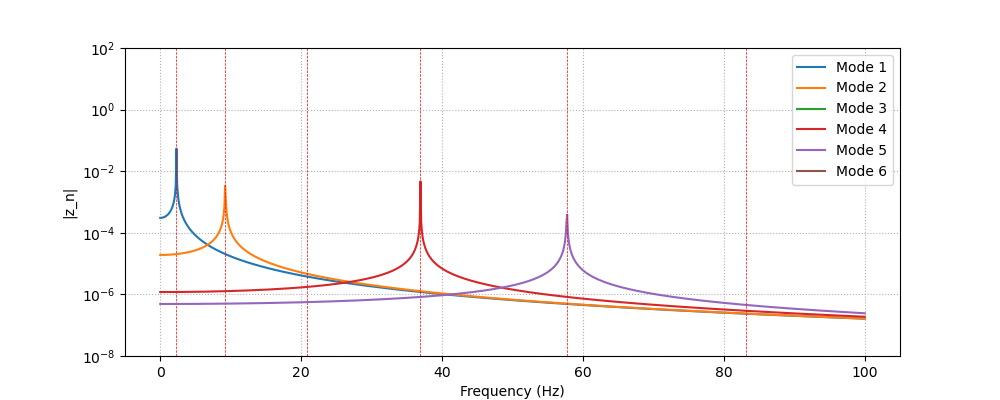

In [25]:
assert len(z_n) == 6, "The length of z_n should be 6"
assert len(z_n[0]) == len(omega), "Each modal response should have same frequency points as omega"
assert np.round(np.max(omega)/2/np.pi,0) == 100, f"Does your pulsation vector (omega) goes to {np.round(np.max(omega)/2/np.pi,0)}Hz rather than to 100Hz."



fig, ax = plt.subplots(figsize=(10, 4))
for i in range(1, 7):
    ax.plot(omega / (2 * np.pi), np.abs(z_n[i-1]), label=f'Mode {i}')
    ax.axvline(natural_pulsation(E, rho, L, I, A, n=i) / (2 * np.pi), color='red', linestyle='--', lw=0.5)
    ax.set_yscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('|z_n|')
ax.legend()
ax.grid(which='both', linestyle=':')
_ = ax.set_ylim(1e-8, 1e2)

## Physical Space <a class="anchor" id="phyiscal"></a>

Once the modal responses $z_n(\omega)$ are computed for each mode, the physical (measured) response $u(\omega)$ at a specific location $x_{\text{out}}$ can be reconstructed by summing the contributions of all modes, each weighted by its mode shape at the measurement point:

$$
u(\omega) = \sum_{n=1}^{N} z_n(\omega) \cdot \psi_n(x_{\text{out}})
$$

Here:
- $z_n(\omega)$ is the frequency response of the $n$-th mode,
- $\psi_n(x_{\text{out}})$ is the value of the $n$-th mode shape at the measurement location $x_{\text{out}}$,
- $N$ is the number of modes considered.


<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 3.1:** Finish the function `physical_response` to compute the total response at a given location $x_{out}$.

In [26]:
def physical_response(z_n, psi_n):
    """
    Compute the physical response of the beam for a given mode.

    Arguments:
    z_n (array) -- modal response for mode n
    psi_n (array) -- mode shape for mode n

    Returns:
    u_n (array) -- physical response of the beam
    """
    
    u_n = z_n*psi_n
    
    return u_n

Lets test your implementation (Hidden Test)

In [27]:
x_outt = L/3



### Total Response <a class="anchor" id="utot"></a>

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 3.2:** Compute the phyiscal response of the beam at $x_{out} = L/2$ using the function `physical_response` and plot your results.

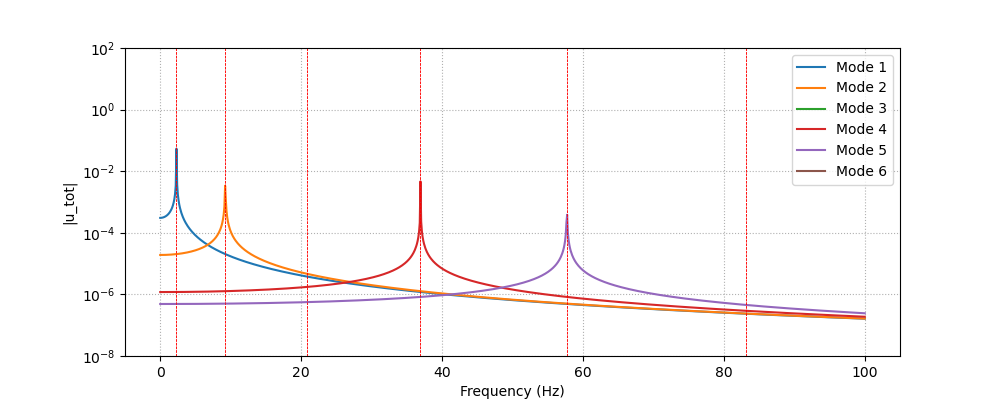

In [28]:
x_out = None # position where the physical response is evaluated
u_tot = None # total physical response

x_out = L/2
u_tot = np.zeros_like(omega, dtype=complex)
for n in range(1, 7):
    u_n = physical_response(z_n[n-1],modal_shape(L,x_out,n))
    u_tot += u_n

for n in range(1, 7):
    ax.axvline(natural_pulsation(E, rho, L, I, A, n=n) / (2 * np.pi), color='red', linestyle='--', lw=0.5)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('|u_tot|')
ax.set_yscale('log')
ax.grid(which='both', linestyle=':')
_  = ax.legend()

plt.show()

**Check your plot**.
What are you observing in the plot above? The peaks in the $u_{tot}$ correspond to the natural frequencies of the system? We see only mode 1 and mode 5, why? Look back at the mode shapes plot in **Assignment 1.4** with the first six mode shapes of the beam.

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 3.3:** Looking at the mode shapes, which modes are not observed at the FRF at the selected input and output locations?
Use the variable `modes_not_observed` to list these modes.

In [29]:
modes_not_observed= []

modes_not_observed = [2,3,4,6] 

And let us check your results (Hidden test)

The animation below demonstrates how the total physical response of the beam changes as you vary the input location of the point load, $p(x_{in})$. This visualization helps you understand the interaction between the input force location, mode shapes, and the measured response in modal analysis of continuous systems.

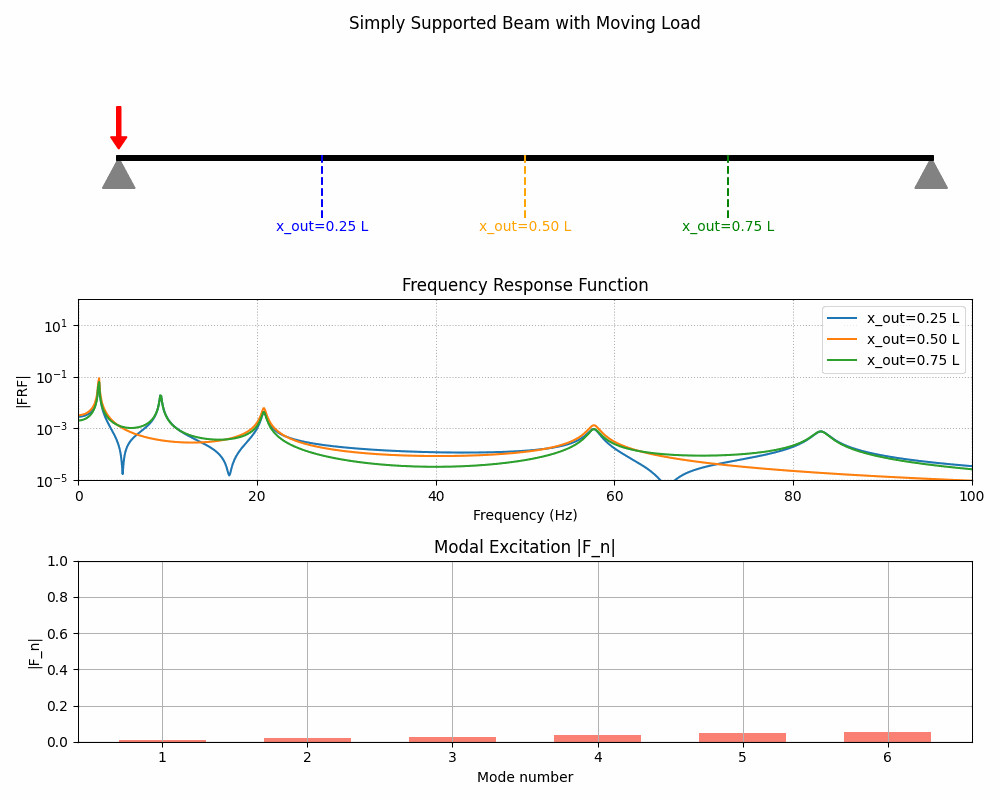

In [30]:
from IPython.display import Image, display
import os
folder = "Animation"
display(Image(filename=os.path.join(folder, 'beam_animation.gif'), width=800, height=400))

What do you observe in the animation above? 

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 3.4:** Which mode is not observed on the beam phyiscal response $|FRF|$ in the animation above and why is that? Write the mode number in `not_observed_mode`.

In [31]:
not_observed_mode = []

not_observed_mode = [2]

And let us check your results (Hidden test)

In [32]:
assert isinstance(not_observed_mode, list), "Put your answer in a list, e.g. not_observed_mode=[42]"
assert not_observed_mode, "Please add an answer to `not_observed_mode`"


### Truncation <a class="anchor" id="truncation"></a>

A continuous system has an infinite number of modes, but in our exercise thusfar we only worked with 6 modes. We are thus truncating our system to just 6 degrees of freedom. Inevitably this introduces an error, as are ignoring the role of the 7th mode and all modes beyond. 

Let us look at bit more at the problem of truncation.

The interactive plot below features a slider that allows you to select the number of modes included in the modal summation, starting from our current assumption to include just 6 modes. Note that we are expanding our view, the x-axis now goes up to 1000 _Hz_.

By adjusting the slider, you can observe how the approximation of the beam's physical response improves as more modes are added. This demonstrates the concept of modal truncation and highlights the trade-off between computational effort and solution accuracy when modeling continuous systems.

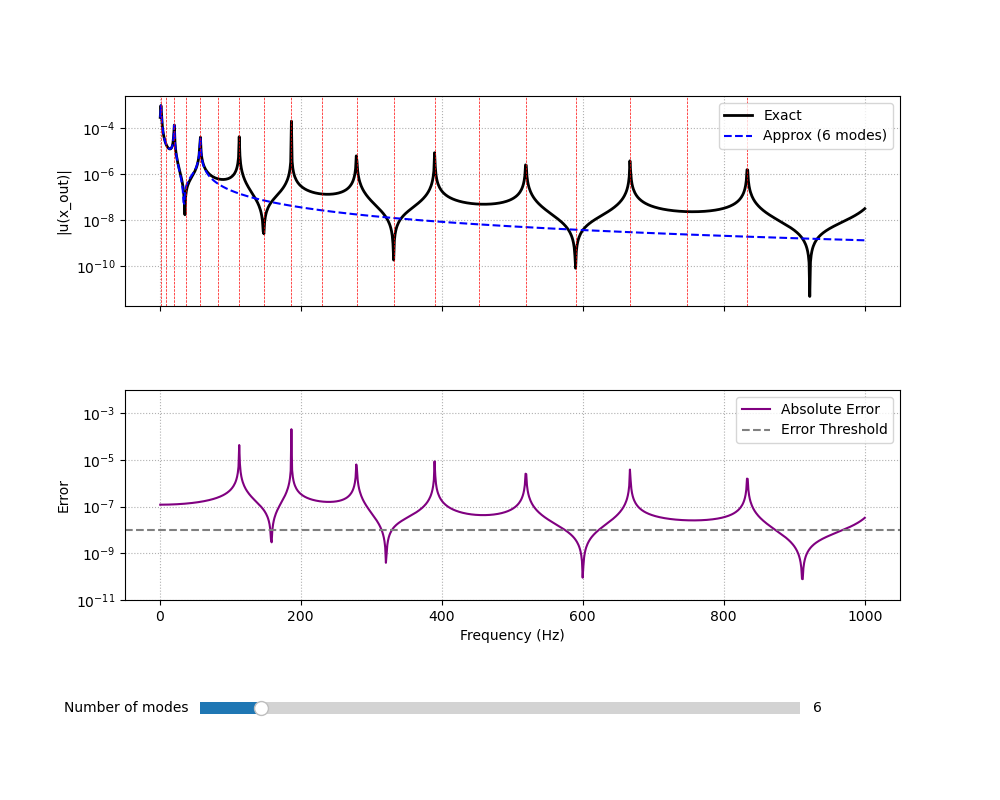

In [33]:
import iplot.interactive_plot_3

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 3.5:** What are the `minimum_modes_required` to minimize the error across all frequncies below the threshold in the error plots.

In [34]:
minimum_modes_required = []

minimum_modes_required = [20]

And let us check your results

In [35]:
assert isinstance(minimum_modes_required, list), "Put your answer in a list, e.g. minimum_modes_required=[42]"
assert minimum_modes_required, "Please add an answer to `minimum_modes_required`"



##  A more complex load profile <a class="anchor" id="dynamic"></a>

So far, we have shown in the previous exercises how the steps to compute the response of a simply supported beam to a simple loading (point load). But the steps we built is the same for any arbitrary spatial distribution of loads acting on the beam.

Now, let us take a case with a more complex load distribution than just a singular point load. 

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 4.1:** Complete the function below `triangle_load` to define a triangularly distributed load on the simply supported load which increases linearly with the beam length from **0 at x=0 to 2 at x=L**.

In [39]:
def triangle_load(x, L):
    """
    Define a triangular distributed load on a simply supported beam.
    
    Arguments:
    x (array-like) -- positions along the length of the beam [m]
    L (float) -- length of the beam [m]
    
    Returns:
    p_x (array-like) -- triangular load distribution [N/m]
    """
    p_x = np.zeros_like(x)
    
    p_x = (2/L)*x
    
    return p_x

Let us check your function, and plot it 

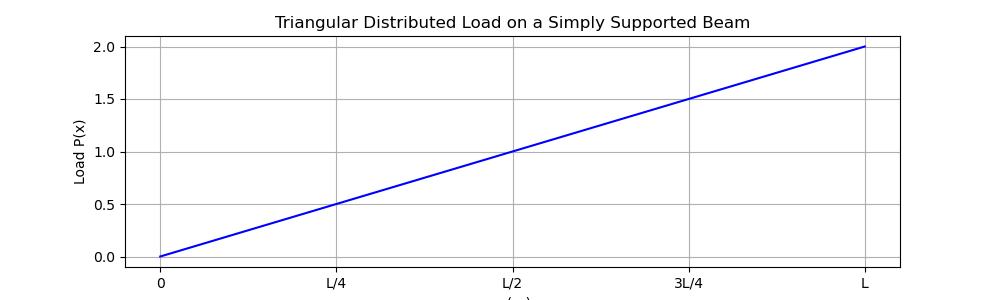

In [40]:
assert len(triangle_load(np.array([0, 0.5, 1]), 1)) == 3, "triangle_load function should return an array of the same length as input x"
assert np.allclose(triangle_load(np.array([0, 0.5, 1]), 1), np.array([0, 1, 2])), "triangle_load function is not correct"

x = np.linspace(0, 1, 1000)
p = triangle_load(x, 1)  # Define the triangular load
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(x, p, color='blue')
ax.set_title('Triangular Distributed Load on a Simply Supported Beam')
ax.set_xlabel('x (m)')
ax.set_ylabel('Load P(x)')
ax.set_xticks([0, L/4, L/2, 3*L/4, L])
ax.set_xticklabels(['0', 'L/4', 'L/2', '3L/4', 'L'])
ax.grid(True)

<div style="border-left: 1px solid black; padding: 1em; margin: 1em 0;">

**Assignment 4.2:** Compute the physical response of the beam excited by the `triangle_load` at $x_{out} = L/2$. Use a range of frequencies of `omega` between 0 and 100 Hz with 1024 segments.

**Tip**: Follow the same steps we used for the point load.

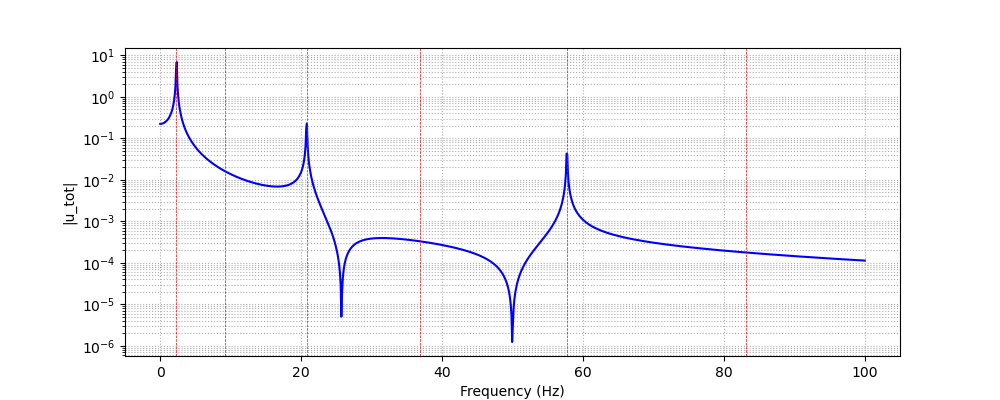

In [43]:
x = np.linspace(0, 1, 1000)
n_list = None  # first 6 modes
psi_list = None # list of mode shapes
p = None  # Define the triangular load
F_triangle_list = []  # list of modal forces for triangular load
omega = None  # array of frequencies
z_triangle = [] # Initialize modal response list for triangular load
x_out = None # position where the physical response is evaluated
u_tot_triangle = None  # total physical response for triangular load

n_list = np.arange(1, 7) # first 6 modes
psi_list = []
for i in n_list:
    psi_list.append(modal_shape(L, x, i))

p = triangle_load(x, L)

F_triangle_list = []
for psi in psi_list:
    F_triangle_list.append(modal_excitation(p, psi, x))

omega = np.linspace(0, 100*2*np.pi, 1024)
omega_n = natural_pulsation(E, rho, L, I, A, n_list)
xi_n = 0

z_triangle = []
for i, n_mode in enumerate(n_list):
    Fn = F_triangle_list[i]
    mu_n = compute_modal_mass(rho, A, L, n_mode)
    z_triangle.append(modal_response(Fn, mu_n, omega_n[i], xi_n, omega))

x_out = L/2
u_tot_triangle = np.zeros_like(omega, dtype=complex)
for i, n_mode in enumerate(n_list):
    psi_at_x_out = modal_shape(L, x_out, n_mode)
    u_n = physical_response(z_triangle[i], psi_at_x_out)
    u_tot_triangle += u_n

fig, ax = plt.subplots(figsize=(10, 4))
ax.semilogy(omega / (2 * np.pi), np.abs(u_tot_triangle), label='$u(x_{out})$', color='blue')
for n in range(1, 7):
    ax.axvline(natural_pulsation(E, rho, L, I, A, n=n) / (2 * np.pi), color='red', linestyle='--', lw=0.5)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('|u_tot|')
ax.grid(which='both', linestyle=':')

Let us check your implementation

In [44]:
assert u_tot_triangle is not None, "Please store your answers in `u_tot_triangle`"
assert (omega[0] == 0) and (np.round(omega[-1]/2/np.pi,0)==100), f"The frequency range should be [0,100], your is [{omega[0]},{omega[-1]/2/np.pi}]"
assert len(omega) == 1024, f"The length of omega should be 1024, yours is {len(omega)}"
assert len(u_tot_triangle) == len(omega), "Length of u_tot_triangle should match the length of omega"
assert np.round(x_out, 1) == 0.5, f"Make sure to submit your results for x_out= L/2! You have: x_out={x_out}"


Try varying the measured location of the physical response $x_{out}$ and observe the changes in your $|u_{tot}|$. What do you observe? Why there are modes disappearing from the plot?

**Important:** Before you submit, make sure you have all results for $x_{out}=L/2$

<div class="alert alert-block alert-info">  
<center><b>That concludes this session. In this session we have tackled the continous system, using equation developed in the course you were able to study the FRF of a beam 
</b></center>  
</div>  